In [1]:
import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline
import warnings                                                                 # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore') 

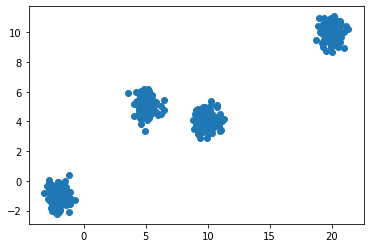

In [14]:
X1, y1 = make_blobs(n_samples=500, centers=[[5,5], [-2, -1],[10,4],[20,10]], cluster_std=0.5)
plt.scatter(X1[:, 0], X1[:, 1], marker='o') 

In [15]:
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'average')
agglom.fit(X1,y1)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=4,
                        pooling_func='deprecated')

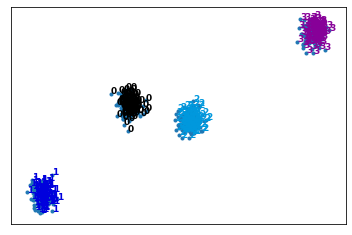

In [16]:
plt.figure(figsize=(6,4))

# These two lines of code are used to scale the data points down,
# Or else the data points will be scattered very far apart.

# Create a minimum and maximum range of X1.
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

# Get the average distance for X1.
X1 = (X1 - x_min) / (x_max - x_min)

# This loop displays all of the datapoints.
for i in range(X1.shape[0]):
    # Replace the data points with their respective cluster value 
    # (ex. 0) and is color coded with a colormap (plt.cm.spectral)
    plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
             color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})
    
# Remove the x ticks, y ticks, x and y axis
plt.xticks([])
plt.yticks([])
#plt.axis('off')



# Display the plot of the original data before clustering
plt.scatter(X1[:, 0], X1[:, 1], marker='.')
# Display the plot
plt.show()

In [17]:
dist_matrix = distance_matrix(X1,X1) 
print(dist_matrix)

[[0.         0.06465338 0.0206461  ... 0.56478049 0.27229837 0.7376094 ]
 [0.06465338 0.         0.05251942 ... 0.62920088 0.27581751 0.68246942]
 [0.0206461  0.05251942 0.         ... 0.58050727 0.25686036 0.71779111]
 ...
 [0.56478049 0.62920088 0.58050727 ... 0.         0.66346759 1.27206005]
 [0.27229837 0.27581751 0.25686036 ... 0.66346759 0.         0.6282665 ]
 [0.7376094  0.68246942 0.71779111 ... 1.27206005 0.6282665  0.        ]]


In [19]:
Z = hierarchy.linkage(dist_matrix, 'average')

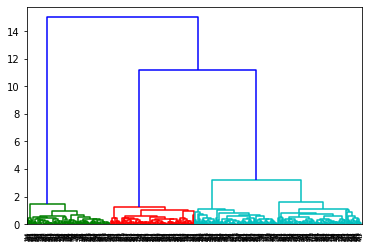

In [20]:

dendro = hierarchy.dendrogram(Z)